# Chapter 11

In [ ]:
classes = 10
input_shape = (32,32,3)
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')
regularizer = tf.keras.regularizers.L2(l2=0.0001)
input = Input(shape=input_shape)
x = Rescaling(1./127.5, offset=-1)(input)
x = Conv2D(32, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x1 = MaxPooling2D()(x)
x = Conv2D(64, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x1)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x = Conv2D(64, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x1 = Conv2D(128, 1, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x1)
x1 = BatchNormalization()(x1)
x = Conv2D(128, 1, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x2 = Add()([x1, x])
x = ReLU()(x2)
x = Dropout(0.2)(x)
x = Conv2D(128, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)
x = Conv2D(128, 3, kernel_initializer=initializer,
                         kernel_regularizer=regularizer, padding='same')(x)
x = BatchNormalization()(x)

x3 = Add()([x2, x])
x = ReLU()(x3)
x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu', kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)
y = Dense(classes, kernel_initializer=initializer,
                         kernel_regularizer=regularizer)(x)

model = Model(input, y)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling_9 (Rescaling)     (None, 32, 32, 3)            0         ['input_15[0][0]']            
                                                                                                  
 conv2d_58 (Conv2D)          (None, 30, 30, 32)           896       ['rescaling_9[0][0]']         
                                                                                                  
 batch_normalization_56 (Ba  (None, 30, 30, 32)           128       ['conv2d_58[0][0]']           
 tchNormalization)                                                                         

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


 tchNormalization)                                                                                
                                                                                                  
 re_lu_29 (ReLU)             (None, 15, 15, 64)           0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 dropout_44 (Dropout)        (None, 15, 15, 64)           0         ['re_lu_29[0][0]']            
                                                                                                  
 conv2d_60 (Conv2D)          (None, 15, 15, 64)           36928     ['dropout_44[0][0]']          
                                                                                                  
 batch_normalization_58 (Ba  (None, 15, 15, 64)           256       ['conv2d_60[0][0]']           
 tchNormal

In [ ]:
from keras.layers import Input, Dense, Conv2D, BatchNormalization
from keras.layers import Dropout, MaxPooling2D, Rescaling, ReLU, ELU
from keras.layers import GlobalAveragePooling2D, Add, Flatten
from keras.models import Model
#import keras_tuner as kt

In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 24.6 MB/s eta 0:00:00


In [ ]:
pip install keras-vis

In [ ]:
def model_builder(hp):
  classes = 10
  input_shape = (32,32,3)
  initializer = tf.keras.initializers.VarianceScaling(scale=.1, mode='fan_in', distribution='uniform')
  regularizer = tf.keras.regularizers.L2(l2=0.0001)

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  input = Input(shape=input_shape)
  x = Rescaling(1./127.5, offset=-1)(input)
  x = Conv2D(64, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Dropout(0.3)(x)
  x1 = MaxPooling2D()(x)
  x = Conv2D(128, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x1)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Dropout(0.3)(x)
  x = Conv2D(128, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)
  x1 = Conv2D(256, 1, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x1)
  x1 = BatchNormalization()(x1)
  x = Conv2D(256, 1, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)
  x2 = Add()([x1, x])
  x = ReLU()(x2)
  x = Dropout(0.3)(x)
  x = Conv2D(256, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Dropout(0.3)(x)
  x = Conv2D(256, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)

  x3 = Add()([x2, x])
  x = ReLU()(x3)
  x = Dropout(0.3)(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(hp_units, activation='relu', kernel_initializer=initializer,
                          kernel_regularizer=regularizer)(x)
  x = Dropout(0.3)(x)
  y = Dense(classes, kernel_initializer=initializer,
                          kernel_regularizer=regularizer)(x)

  model = Model(input, y)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
checkpoint = tf.keras.callbacks.ModelCheckpoint("checkpoint", monitor="val_accuracy", save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.000001)
#patience: Number of step with no improvement after which training will be stopped.

In [ ]:
 # Phase de recherche des hyperparamètres optimaux
tuner.search(train_ds, validation_data=val_ds, epochs=30, callbacks=[stop_early])

# Nous récupérons les hyperparamètres optimaux
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 04m 02s]
val_accuracy: 0.5343000292778015

Best val_accuracy So Far: 0.7455999851226807
Total elapsed time: 00h 51m 02s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
best_hps = {'units': 448, 'learning_rate': 0.001}
def model_builder(hp):
  classes = 10
  input_shape = (32,32,3)
  initializer = tf.keras.initializers.VarianceScaling(scale=.1, mode='fan_in', distribution='uniform')
  regularizer = tf.keras.regularizers.L2(l2=0.0001)

  hp_units = hp['units']
  hp_learning_rate = hp['learning_rate']

  input = Input(shape=input_shape)
  x = Rescaling(1./127.5, offset=-1)(input)
  x = Conv2D(64, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer)(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Dropout(0.3)(x)
  x1 = MaxPooling2D()(x)
  x = Conv2D(128, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x1)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Dropout(0.3)(x)
  x = Conv2D(128, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)
  x1 = Conv2D(256, 1, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x1)
  x1 = BatchNormalization()(x1)
  x = Conv2D(256, 1, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)
  x2 = Add()([x1, x])
  x = ReLU()(x2)
  x = Dropout(0.3)(x)
  x = Conv2D(256, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Dropout(0.3)(x)
  x = Conv2D(256, 3, kernel_initializer=initializer,
                          kernel_regularizer=regularizer, padding='same')(x)
  x = BatchNormalization()(x)

  x3 = Add()([x2, x])
  x = ReLU()(x3)
  x = Dropout(0.3)(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(hp_units, activation='relu', kernel_initializer=initializer,
                          kernel_regularizer=regularizer)(x)
  x = Dropout(0.3)(x)
  y = Dense(classes, kernel_initializer=initializer,
                          kernel_regularizer=regularizer)(x)

  model = Model(input, y)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

model = model_builder(best_hps)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
#model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[stop_early])
model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
625/625 [==============================] - 40s 39ms/step - loss: 1.5689 - accuracy: 0.4187 - val_loss: 1.6632 - val_accuracy: 0.4214
Epoch 2/50
625/625 [==============================] - 24s 38ms/step - loss: 1.2655 - accuracy: 0.5648 - val_loss: 1.2831 - val_accuracy: 0.5624
Epoch 3/50
625/625 [==============================] - 24s 38ms/step - loss: 1.1485 - accuracy: 0.6188 - val_loss: 1.2474 - val_accuracy: 0.5870
Epoch 4/50
625/625 [==============================] - 24s 38ms/step - loss: 1.0798 - accuracy: 0.6512 - val_loss: 1.2169 - val_accuracy: 0.6026
Epoch 5/50
625/625 [==============================] - 23s 37ms/step - loss: 1.0342 - accuracy: 0.6744 - val_loss: 1.3879 - val_accuracy: 0.5744
Epoch 6/50
625/625 [==============================] - 24s 38ms/step - loss: 0.9890 - accuracy: 0.6959 - val_loss: 1.2673 - val_accuracy: 0.6076
Epoch 7/50
625/625 [==============================] - 24s 38ms/step - loss: 0.9478 - accuracy: 0.7133 - val_loss: 1.3257 - val_accuracy:

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[checkpoint, reduce_lr, stop_early])

Epoch 1/20
625/625 [==============================] - 25s 39ms/step - loss: 0.3101 - accuracy: 0.9728 - val_loss: 0.6616 - val_accuracy: 0.8731 - lr: 4.0000e-05
Epoch 2/20
625/625 [==============================] - 25s 40ms/step - loss: 0.3087 - accuracy: 0.9720 - val_loss: 0.6605 - val_accuracy: 0.8751 - lr: 4.0000e-05
Epoch 3/20
625/625 [==============================] - 24s 39ms/step - loss: 0.3083 - accuracy: 0.9724 - val_loss: 0.6587 - val_accuracy: 0.8736 - lr: 4.0000e-05
Epoch 4/20
625/625 [==============================] - 24s 39ms/step - loss: 0.3022 - accuracy: 0.9739 - val_loss: 0.6613 - val_accuracy: 0.8747 - lr: 4.0000e-05
Epoch 5/20
625/625 [==============================] - 24s 39ms/step - loss: 0.2973 - accuracy: 0.9753 - val_loss: 0.6654 - val_accuracy: 0.8731 - lr: 4.0000e-05
Epoch 6/20
625/625 [==============================] - 24s 39ms/step - loss: 0.2976 - accuracy: 0.9743 - val_loss: 0.6699 - val_accuracy: 0.8717 - lr: 4.0000e-05
Epoch 7/20
625/625 [==============

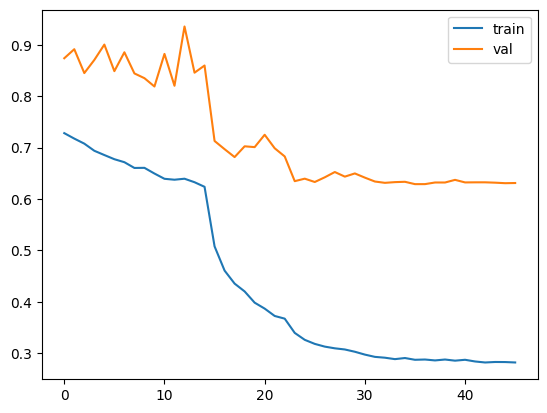

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
!zip -r load_model.zip checkpoint

	zip warning: name not matched: checkpoint

zip error: Nothing to do! (try: zip -r load_model.zip . -i checkpoint)


In [ ]:
!unzip load_model.zip -d checkpoint

Archive:  load_model.zip
   creating: checkpoint/checkpoint/
   creating: checkpoint/checkpoint/assets/
 extracting: checkpoint/checkpoint/fingerprint.pb  
  inflating: checkpoint/checkpoint/keras_metadata.pb  
  inflating: checkpoint/checkpoint/saved_model.pb  
   creating: checkpoint/checkpoint/variables/
  inflating: checkpoint/checkpoint/variables/variables.index  
  inflating: checkpoint/checkpoint/variables/variables.data-00000-of-00001  


In [ ]:
loaded_model = tf.keras.models.load_model('checkpoint/checkpoint')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:

_, train_acc = loaded_model.evaluate(train_ds, verbose=0)
_, val_acc = loaded_model.evaluate(val_ds, verbose=0)
_, test_acc = loaded_model.evaluate(test_ds, verbose=0)

In [ ]:

print('Train: %.3f, Val: %.3f, Test: %.3f' % (train_acc, val_acc, test_acc))

Train: 0.982, Val: 0.879, Test: 0.871


In [ ]:
loaded_model.save("loaded_model.h5")
loaded_model_2 = tf.keras.models.load_model("loaded_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model_2.predict(test_ds)

157/157 [==============================] - 2s 9ms/step


array([[-6.2850094 , -9.679666  ,  3.276113  , ...,  2.937332  ,
        -7.7603507 , -9.272035  ],
       [ 4.426152  , -0.29999274, -3.6486478 , ..., -4.767433  ,
        -2.1966665 ,  0.33733568],
       [-8.65735   , -7.5087156 ,  0.45113802, ..., -8.45746   ,
        -6.396392  , -6.7200065 ],
       ...,
       [-0.6832382 , -4.0135274 , -4.54165   , ..., -6.95442   ,
         8.914456  , -4.5544124 ],
       [-4.178699  , -7.539057  , -0.43555814, ..., -4.6572547 ,
        -4.2781615 , -4.6569834 ],
       [ 4.7286954 , -7.889296  ,  0.82077676, ..., -3.5725513 ,
        -4.9654236 , -5.020662  ]], dtype=float32)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
import cv2

1/1 [==============================] - 0s 19ms/step


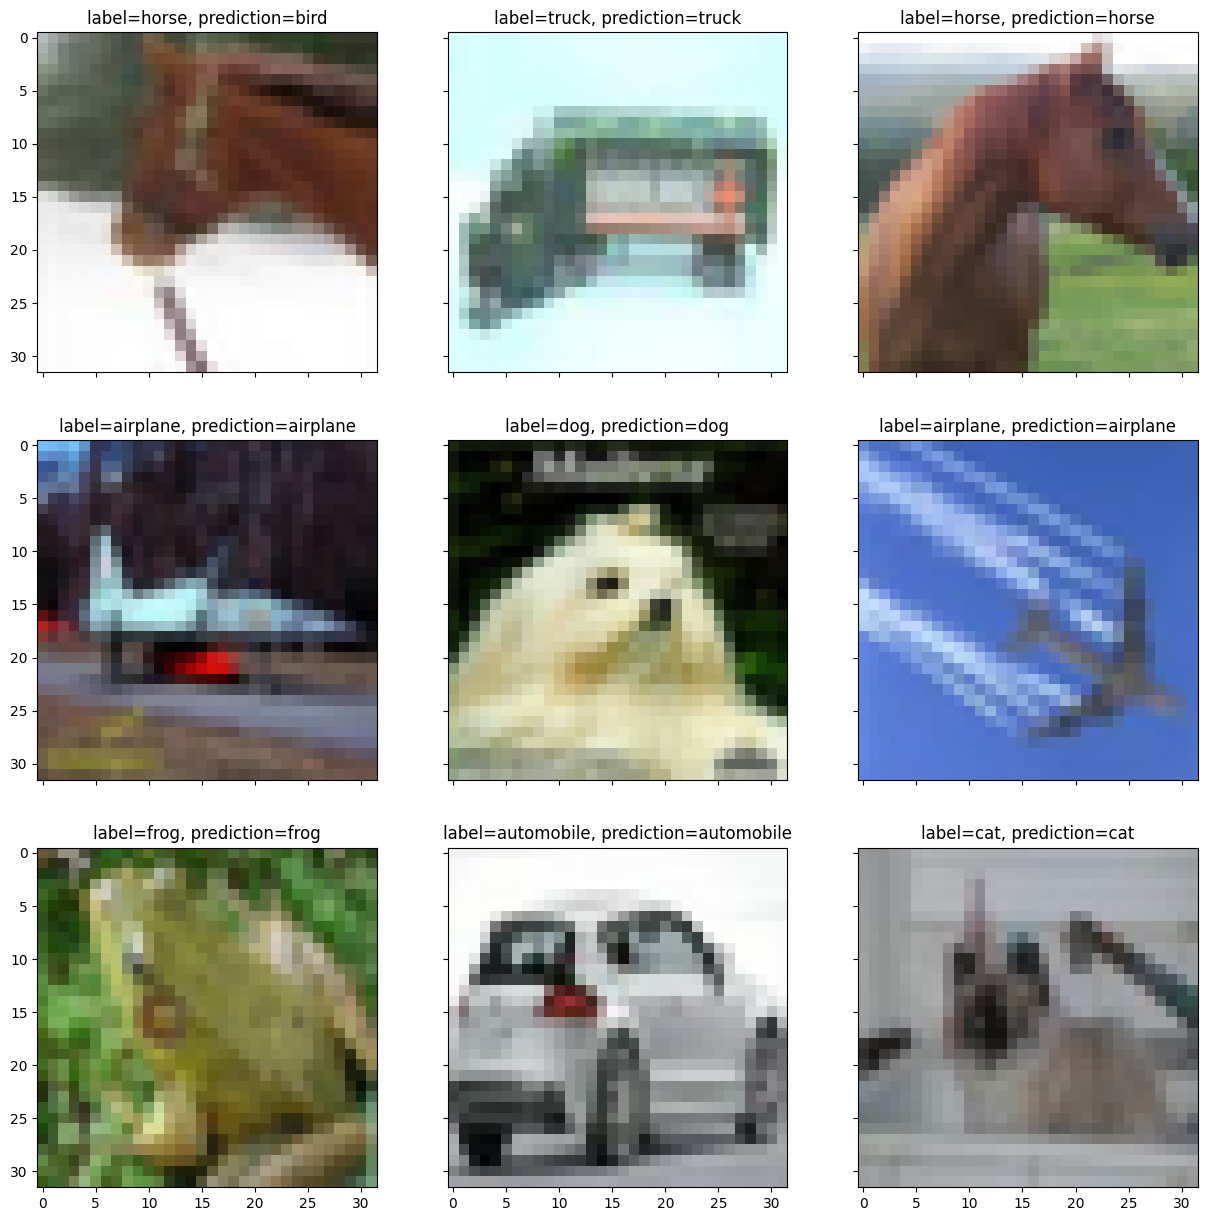

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15,15))
from tensorflow.python.types import data
one_batch_of_images = test_ds.take(1)
dataset_element = list(one_batch_of_images.as_numpy_iterator())[0]
images = dataset_element[0][:9]
prediction = loaded_model.predict(images)
ground_truths = dataset_element[1][:9]
for i in range(9):
  y_pred = labels[np.argmax(prediction, axis=1)[i]]
  label = labels[ground_truths[i]]
  ax[i%3][i//3].imshow(images[i].astype("uint8"))
  cv2.imwrite(f"image_{i}.png", cv2.cvtColor(images[i].astype("uint8"), cv2.COLOR_RGB2BGR))
  ax[i%3][i//3].set_title(f"label={label}, prediction={y_pred}")
  i += 1
plt.show()

